<a href="https://colab.research.google.com/github/skjsourabh95/Machine_Learning_Projects/blob/master/transactions_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





> >>**MUlTICLASS CLASSIFICATION NOTEBOOK ON BANKING TRANSACTION DATA**



Connecting Google drive as background database for our hosted runtime environment provided by colab

In [1]:
# Load the Drive helper and mount
from google.colab import drive
#mounting the drive to get access to the files
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import os
os.listdir('/content/drive/My Drive/Data')

['automobile.csv',
 'diabetes.csv',
 'hotel.csv',
 'titanic.csv',
 'trees.csv',
 'Superstore.csv',
 'modeling_inp.csv']

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the dataset from a CSV file

data = pd.read_csv('/content/drive/My Drive/Data/modeling_inp.csv', encoding='utf-8')
data.head()

,CUSTNO,Cr.Funds.Transfer.total,Cr.Payments.total,Dr.Funds.Transfer.total,Cr.Funds.Transfer.count,Cr.Payments.count,Dr.Funds.Transfer.count,Dr.Payments.count,CUSTNO.1,CUSTTYPE,...,prodCategory,prodType,productRisk,TXDATE_year,CASHFLOWTYPE,TXAMT,beneficiaryCountry,txnChannel,txnMode,riskRating
0,46783,0.0,21022.0,0.00000,0,1,0,1,45289,1,...,Loan,Working Capital,Medium High,2015,Cr,2843.700000,NaN,Branch,Cash,1
1,47665,0.0,23345.0,0.00000,0,1,0,2,45244,1,...,Loan,Working Capital,Low,2015,Cr,2222.194444,India,Internet,Payments,1
2,45488,0.0,24155.0,0.00000,0,1,0,1,47154,1,...,Current,Receivables,Low,2015,Dr,3591.444444,India,Internet,Funds Transfer,1
3,50233,0.0,0.0,10512.50000,0,0,1,3,47541,1,...,Loan,Working Capital,Medium,2015,Cr,3187.000000,India,Branch,Funds Transfer,1
4,47820,0.0,0.0,13802.66667,0,0,2,4,45258,1,...,Loan,Working Capital,Medium,2015,Dr,6775.666667,USA,Branch,Funds Transfer,1


In [5]:
# Data Analysis
data.shape

(3170, 30)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 30 columns):
CUSTNO                     3170 non-null int64
Cr.Funds.Transfer.total    3170 non-null float64
Cr.Payments.total          3170 non-null float64
Dr.Funds.Transfer.total    3170 non-null float64
Cr.Funds.Transfer.count    3170 non-null int64
Cr.Payments.count          3170 non-null int64
Dr.Funds.Transfer.count    3170 non-null int64
Dr.Payments.count          3170 non-null int64
CUSTNO.1                   3170 non-null int64
CUSTTYPE                   3170 non-null int64
ACCTNO                     3170 non-null int64
TYPEOFBUSINESS             3170 non-null object
COMPANYCAT                 3170 non-null object
countryIncorporation       3170 non-null object
countryTaxResidency        3170 non-null object
addressBusinessCountry     3170 non-null object
expValCashDeposits         3170 non-null object
expTotalDeposits           3170 non-null object
STATUS                     3170 no

In [7]:
# data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTNO,3170.0,4.801159e+04,1.721469e+03,4.500400e+04,4.655125e+04,4.804050e+04,4.947750e+04,5.100000e+04
Cr.Funds.Transfer.total,3170.0,5.209770e+04,6.220150e+04,0.000000e+00,2.946523e+04,4.478483e+04,6.498300e+04,3.130892e+06
Cr.Payments.total,3170.0,3.517072e+04,5.640069e+04,0.000000e+00,1.902713e+04,2.972840e+04,4.352091e+04,2.978585e+06
Dr.Funds.Transfer.total,3170.0,4.161505e+04,4.359463e+04,0.000000e+00,2.355740e+04,3.525523e+04,5.289966e+04,2.092784e+06
Cr.Funds.Transfer.count,3170.0,1.694511e+01,1.095731e+01,0.000000e+00,9.000000e+00,1.500000e+01,2.300000e+01,7.800000e+01
Cr.Payments.count,3170.0,1.134637e+01,7.691259e+00,0.000000e+00,6.000000e+00,1.000000e+01,1.500000e+01,5.600000e+01
Dr.Funds.Transfer.count,3170.0,1.343028e+01,8.620155e+00,0.000000e+00,7.000000e+00,1.200000e+01,1.800000e+01,6.600000e+01
Dr.Payments.count,3170.0,9.012618e+00,6.137467e+00,0.000000e+00,5.000000e+00,8.000000e+00,1.200000e+01,4.800000e+01
CUSTNO.1,3170.0,4.801159e+04,1.721469e+03,4.500400e+04,4.655125e+04,4.804050e+04,4.947750e+04,5.100000e+04
CUSTTYPE,3170.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b48260710>,
      dtype=object)

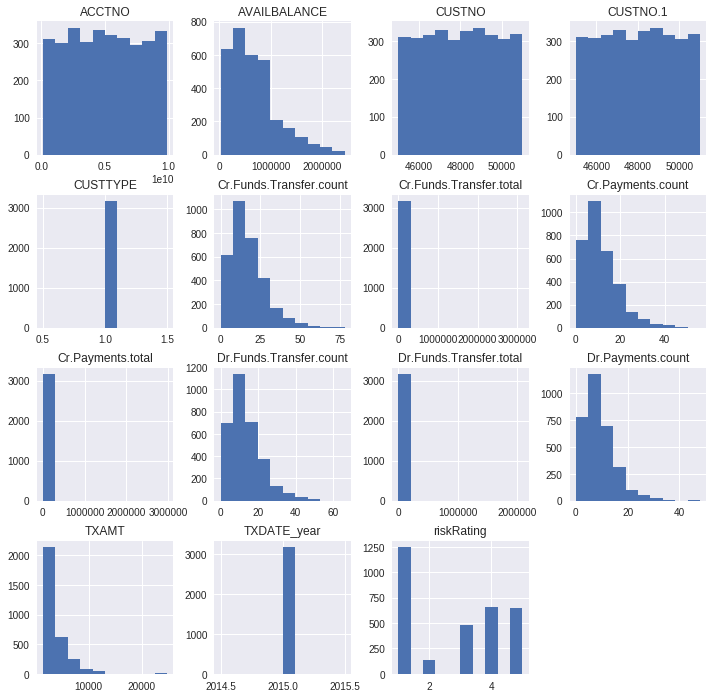

In [8]:
# understanding feature probabitlity distribution and skewness
data.hist(figsize = (12,12))

In [9]:
# static data columns inspection
data['CUSTTYPE'].value_counts()

1    3170
Name: CUSTTYPE, dtype: int64

In [10]:
data['STATUS'].value_counts()

Active    3170
Name: STATUS, dtype: int64

In [11]:
data['TXDATE_year'].value_counts()

2015    3170
Name: TXDATE_year, dtype: int64

In [0]:
# on close inspection we can find certain columns having fixed value in all its rows and thus they could not impact our target variable thus dropping them off.
data.drop(['CUSTTYPE', 'STATUS','TXDATE_year'], axis=1,inplace=True)
# certain columns too doesnt provide any help in model tuning so dropping them
data.drop(['CUSTNO.1', 'CUSTNO','ACCTNO'], axis=1,inplace=True)

In [13]:
# data after initial inspection
data.head()

,Cr.Funds.Transfer.total,Cr.Payments.total,Dr.Funds.Transfer.total,Cr.Funds.Transfer.count,Cr.Payments.count,Dr.Funds.Transfer.count,Dr.Payments.count,TYPEOFBUSINESS,COMPANYCAT,countryIncorporation,...,AVAILBALANCE,prodCategory,prodType,productRisk,CASHFLOWTYPE,TXAMT,beneficiaryCountry,txnChannel,txnMode,riskRating
0,0.0,21022.0,0.00000,0,1,0,1,Gems and Jewellery,Private,United States of America,...,205754.4894,Loan,Working Capital,Medium High,Cr,2843.700000,NaN,Branch,Cash,1
1,0.0,23345.0,0.00000,0,1,0,2,Gems and Jewellery,Private,India,...,460281.8224,Loan,Working Capital,Low,Cr,2222.194444,India,Internet,Payments,1
2,0.0,24155.0,0.00000,0,1,0,1,Gems and Jewellery,Public,India,...,991142.2200,Current,Receivables,Low,Dr,3591.444444,India,Internet,Funds Transfer,1
3,0.0,0.0,10512.50000,0,0,1,3,Gems and Jewellery,Public,India,...,383403.7932,Loan,Working Capital,Medium,Cr,3187.000000,India,Branch,Funds Transfer,1
4,0.0,0.0,13802.66667,0,0,2,4,Gems and Jewellery,Public,India,...,761104.8973,Loan,Working Capital,Medium,Dr,6775.666667,USA,Branch,Funds Transfer,1


In [14]:
#checking missing values in the dataframe
data.isnull().sum().sort_values(ascending=False)

beneficiaryCountry         497
riskRating                   0
countryTaxResidency          0
Cr.Payments.total            0
Dr.Funds.Transfer.total      0
Cr.Funds.Transfer.count      0
Cr.Payments.count            0
Dr.Funds.Transfer.count      0
Dr.Payments.count            0
TYPEOFBUSINESS               0
COMPANYCAT                   0
countryIncorporation         0
addressBusinessCountry       0
txnMode                      0
expValCashDeposits           0
expTotalDeposits             0
AVAILBALANCE                 0
prodCategory                 0
prodType                     0
productRisk                  0
CASHFLOWTYPE                 0
TXAMT                        0
txnChannel                   0
Cr.Funds.Transfer.total      0
dtype: int64

In [15]:
#imputing missing values

# since N/A could be anything i initiall tried substituting this value by the addressBusinessCountry but there was a low score so shifted it to a altogether different class
data['beneficiaryCountry'].fillna('No', inplace = True)
data.isnull().sum().sort_values(ascending=False)

riskRating                 0
txnMode                    0
Cr.Payments.total          0
Dr.Funds.Transfer.total    0
Cr.Funds.Transfer.count    0
Cr.Payments.count          0
Dr.Funds.Transfer.count    0
Dr.Payments.count          0
TYPEOFBUSINESS             0
COMPANYCAT                 0
countryIncorporation       0
countryTaxResidency        0
addressBusinessCountry     0
expValCashDeposits         0
expTotalDeposits           0
AVAILBALANCE               0
prodCategory               0
prodType                   0
productRisk                0
CASHFLOWTYPE               0
TXAMT                      0
beneficiaryCountry         0
txnChannel                 0
Cr.Funds.Transfer.total    0
dtype: int64

1    1250
4     654
5     650
3     484
2     132
Name: riskRating, dtype: int64


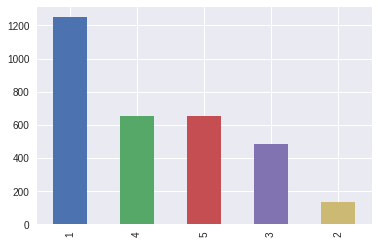

In [16]:
#Univariate Analysis

#undestanding our target variable
print(data['riskRating'].value_counts())
data['riskRating'].value_counts(ascending=False).plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b45c38ac8>,
      dtype=object)

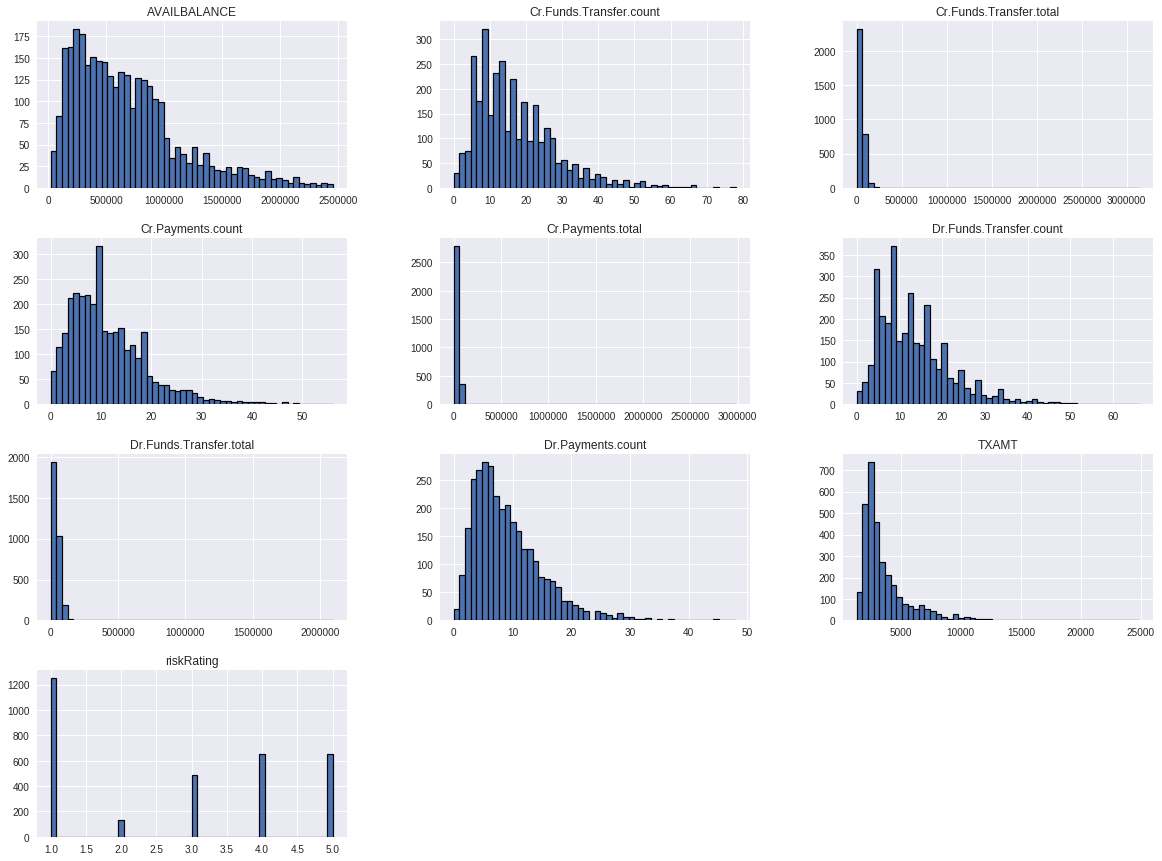

In [17]:
data.hist(bins=50, figsize=(20,15),edgecolor='black', linewidth=1.2)


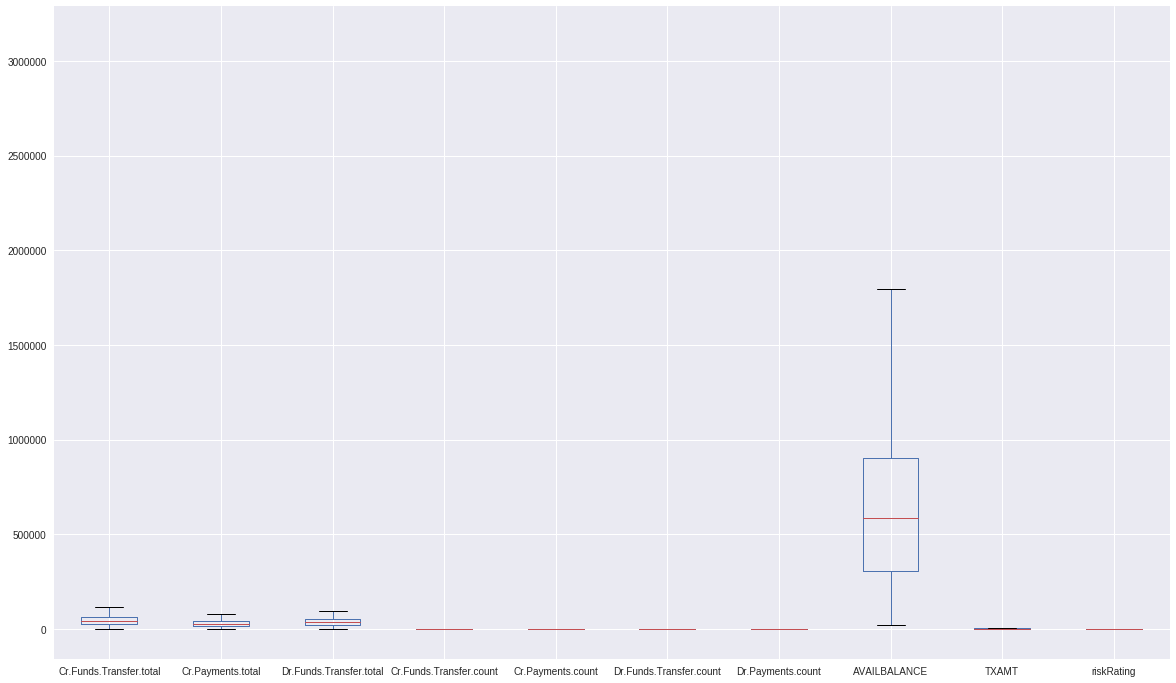

In [18]:
#outlier detection
data.plot(kind='box',figsize=(20,12))

# we can conclude that a scaling and standardizatiuon of data is reuqired to remove the skewness and transfeering the data between 0 to 1 with a mean of 0

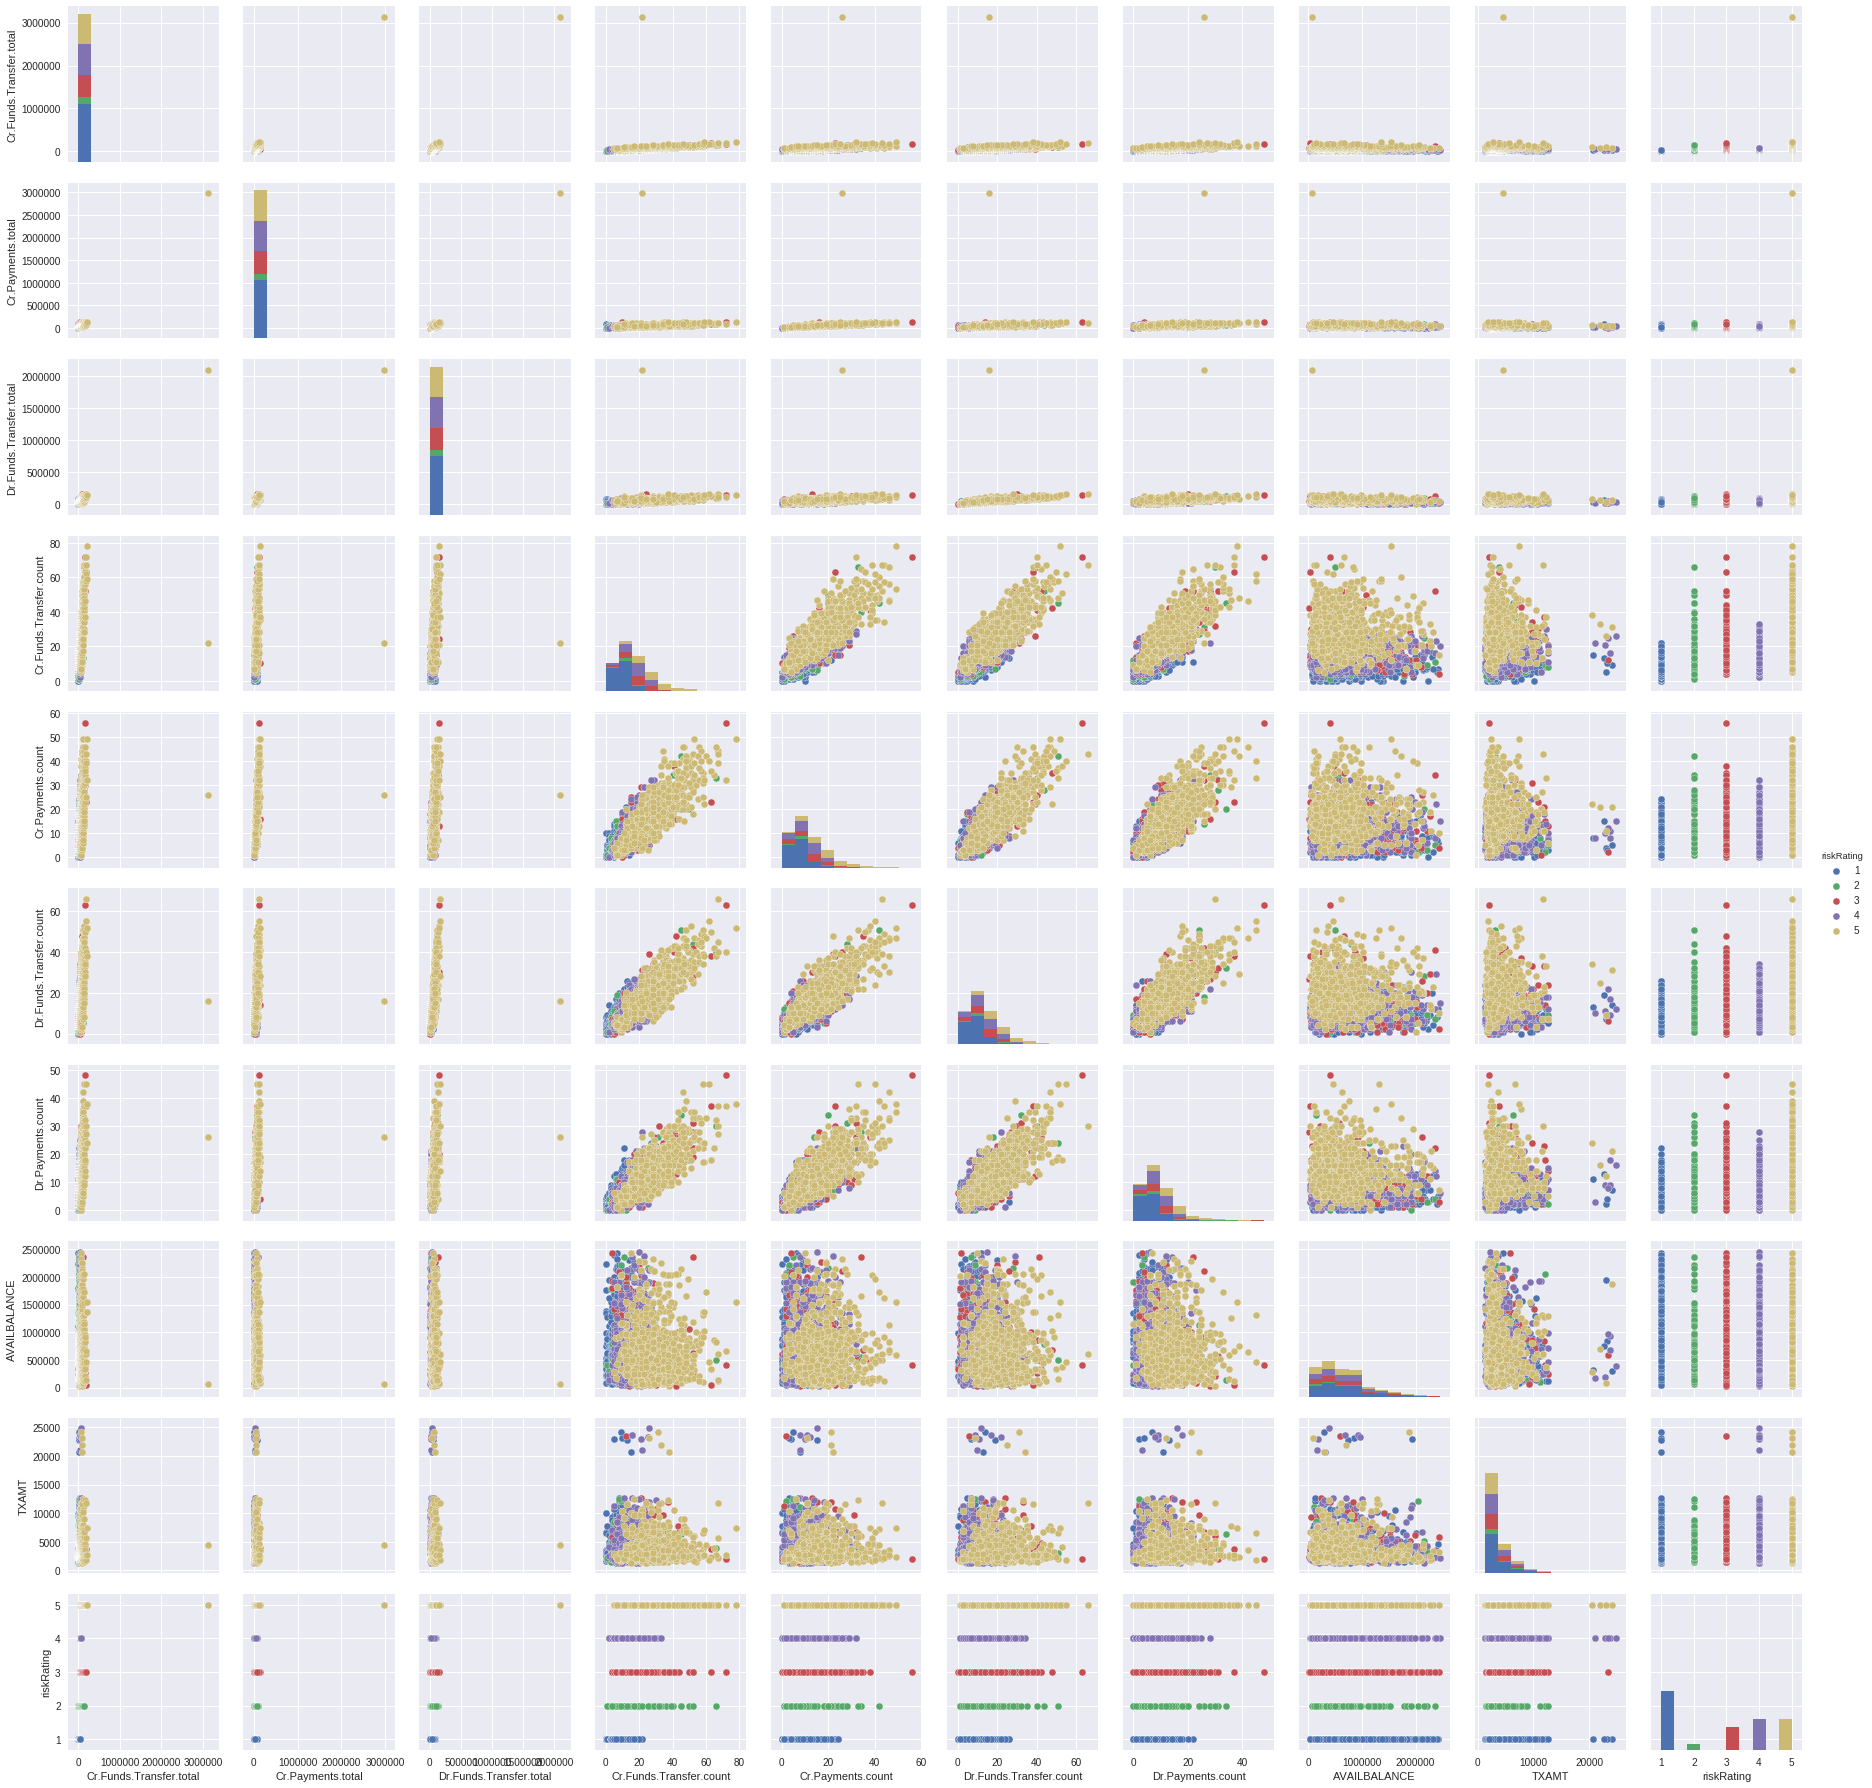

In [19]:
#Multivariate Plot Vizualization

#scatter plot to check the spread and correlation of data according to our target variable
sns.pairplot(data, hue = 'riskRating')

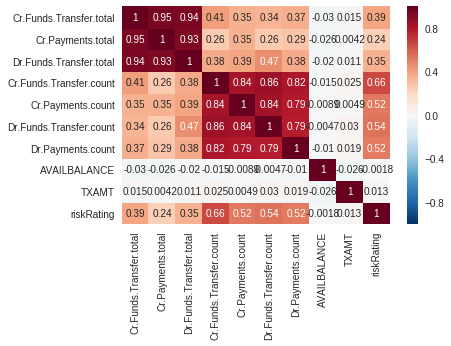

In [20]:
#correlation among features
sns.heatmap(data.corr(), annot=True)

# we find certain varaibles with strong correlation values which are importatnt to the data and also removing one of the data feature from the two corealtion would not affect the model outcome


In [21]:
data.columns

Index(['Cr.Funds.Transfer.total', 'Cr.Payments.total',
       'Dr.Funds.Transfer.total', 'Cr.Funds.Transfer.count',
       'Cr.Payments.count', 'Dr.Funds.Transfer.count', 'Dr.Payments.count',
       'TYPEOFBUSINESS', 'COMPANYCAT', 'countryIncorporation',
       'countryTaxResidency', 'addressBusinessCountry', 'expValCashDeposits',
       'expTotalDeposits', 'AVAILBALANCE', 'prodCategory', 'prodType',
       'productRisk', 'CASHFLOWTYPE', 'TXAMT', 'beneficiaryCountry',
       'txnChannel', 'txnMode', 'riskRating'],
      dtype='object')

In [0]:
# a plot utility function to plot relationship between variables
def plot_utility(p1,p2):
  x1=data[data['riskRating']==1]
  x2=data[data['riskRating']==2]
  x3=data[data['riskRating']==3]
  x4=data[data['riskRating']==4]
  x5=data[data['riskRating']==5]
  plt.scatter(x1[p1],x1[p2],color='orange', label='1')
  plt.scatter(x2[p1],x2[p2],color='red', label='2')
  plt.scatter(x3[p1],x3[p2],color='violet', label='3')
  plt.scatter(x4[p1],x4[p2],color='black', label='4')
  plt.scatter(x5[p1],x5[p2],color='blue', label='5')
  plt.xlabel(p1)
  plt.ylabel(p2)
  plt.title("%s VS %s"%(p1,p2))
  plt.figure(figsize=(20,8))
  plt.show()


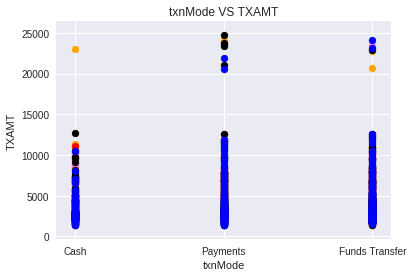

<Figure size 1440x576 with 0 Axes>

In [81]:
plot_utility('txnMode','TXAMT')

In [0]:
#creating dummy variable for categorical features

all_data=data.columns
numeric=data._get_numeric_data().columns
categorical=list(set(all_data)-set(numeric))
df_with_dummies = pd.get_dummies(data, prefix='Category_', columns=categorical)
X=df_with_dummies.loc[:, df_with_dummies.columns != 'riskRating']
y=df_with_dummies['riskRating']

In [0]:
cols=X.columns

In [26]:
# Scaling the data
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(X),columns=cols)
X.head()

,Cr.Funds.Transfer.total,Cr.Payments.total,Dr.Funds.Transfer.total,Cr.Funds.Transfer.count,Cr.Payments.count,Dr.Funds.Transfer.count,Dr.Payments.count,AVAILBALANCE,TXAMT,Category__Gems and Jewellery,...,Category__Internet,Category__Cr,Category__Dr,Category__India,Category__United States of America,Category__Procurement of Inventory,Category__Receivables,Category__Working Capital,Category__Private,Category__Public
0,-0.837696,-0.250900,-0.954742,-1.54671,-1.345424,-1.558255,-1.305731,-1.004736,-0.367665,0.713306,...,-1.423973,0.819182,-0.819182,-1.005694,1.005694,-0.698758,-0.719356,1.421944,1.024916,-1.024916
1,-0.837696,-0.209706,-0.954742,-1.54671,-1.345424,-1.558255,-1.142772,-0.461280,-0.624052,0.713306,...,0.702261,0.819182,-0.819182,0.994338,-0.994338,-0.698758,-0.719356,1.421944,1.024916,-1.024916
2,-0.837696,-0.195343,-0.954742,-1.54671,-1.345424,-1.558255,-1.305731,0.672192,-0.059202,0.713306,...,0.702261,-1.220730,1.220730,0.994338,-0.994338,-0.698758,1.390133,-0.703262,-0.975690,0.975690
3,-0.837696,-0.623685,-0.713562,-1.54671,-1.475462,-1.442230,-0.979812,-0.625426,-0.226045,0.713306,...,-1.423973,0.819182,-0.819182,0.994338,-0.994338,-0.698758,-0.719356,1.421944,-0.975690,0.975690
4,-0.837696,-0.623685,-0.638078,-1.54671,-1.475462,-1.326204,-0.816853,0.181026,1.254371,0.713306,...,-1.423973,-1.220730,1.220730,0.994338,-0.994338,-0.698758,-0.719356,1.421944,-0.975690,0.975690


In [27]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2219, 51)
(2219,)
(951, 51)
(951,)


In [0]:
# model building and pretesting with different classification models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis\
from sklearn.linear_model import LogisticRegression

In [59]:
abc=[]
classifiers=["Nearest Neighbors", "Linear SVM","Decision Tree","Random Forest","Naive Bayes","QDA","LogisticRegression"]
models=[
    KNeighborsClassifier(),
    SVC(C=5.0),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(max_depth = 3),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]
for i in models:
    model = i
    model.fit(X_train, y_train)
    abc.append(model.score(X_test,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Score']
models_dataframe

,Score
Nearest Neighbors,0.525762
Linear SVM,0.791798
Decision Tree,0.892744
Random Forest,0.803365
Naive Bayes,0.437434
QDA,0.295478
LogisticRegression,0.818086


In [0]:
##looks like decision tree with a max depth of 5 gives good results but without the max_depth it may overfit the data that can have negative impact on our unseen data while predicting
# Logistic regression also seams to be a good idea but lets proceed with decision tree as it predicts the value of a target variable by learning simple decision rules inferred from the data features.
# thus this rules based decision with proper hypertuning would really give a powerful model.

In [0]:
model=DecisionTreeClassifier(max_depth = 5)
model_fit=model.fit(X_train,y_train)

In [71]:
print("Accuracy of Logistic regression classifier on training set:",model.score(X_train,y_train))
print("Accuracy of Logistic regression classifier on test set:",model.score(X_test,y_test))

Accuracy of Logistic regression classifier on training set: 0.9625957638575935
Accuracy of Logistic regression classifier on test set: 0.9526813880126183


In [72]:
from sklearn import metrics
predict=model.predict(X_test)
print("Accuracy Score on Prediction:",metrics.accuracy_score(y_test,predict))

Accuracy Score on Prediction: 0.9526813880126183



The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
 It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.



In [77]:
# Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
# since decision tree can give baised results we do a k-fold cross validation-

from sklearn.model_selection import cross_val_score
#10-fold cross validation
score = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(score.mean())

0.9051039641284075


Text(0.5, 15.0, 'Predicted label')

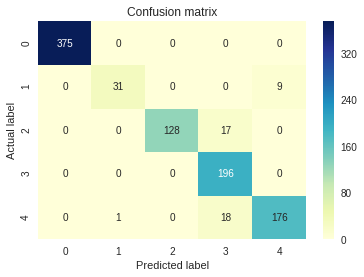

In [74]:
# metrics.confusion_matrix(y_test, predict)

# The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class

cnf_matrix = metrics.confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       375
           2       0.97      0.78      0.86        40
           3       1.00      0.88      0.94       145
           4       0.85      1.00      0.92       196
           5       0.95      0.90      0.93       195

   micro avg       0.95      0.95      0.95       951
   macro avg       0.95      0.91      0.93       951
weighted avg       0.96      0.95      0.95       951



In [0]:
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

#he recall is intuitively the ability of the classifier to find all the positive samples.

#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0

#The support is the number of occurrences of each class in y_pred.

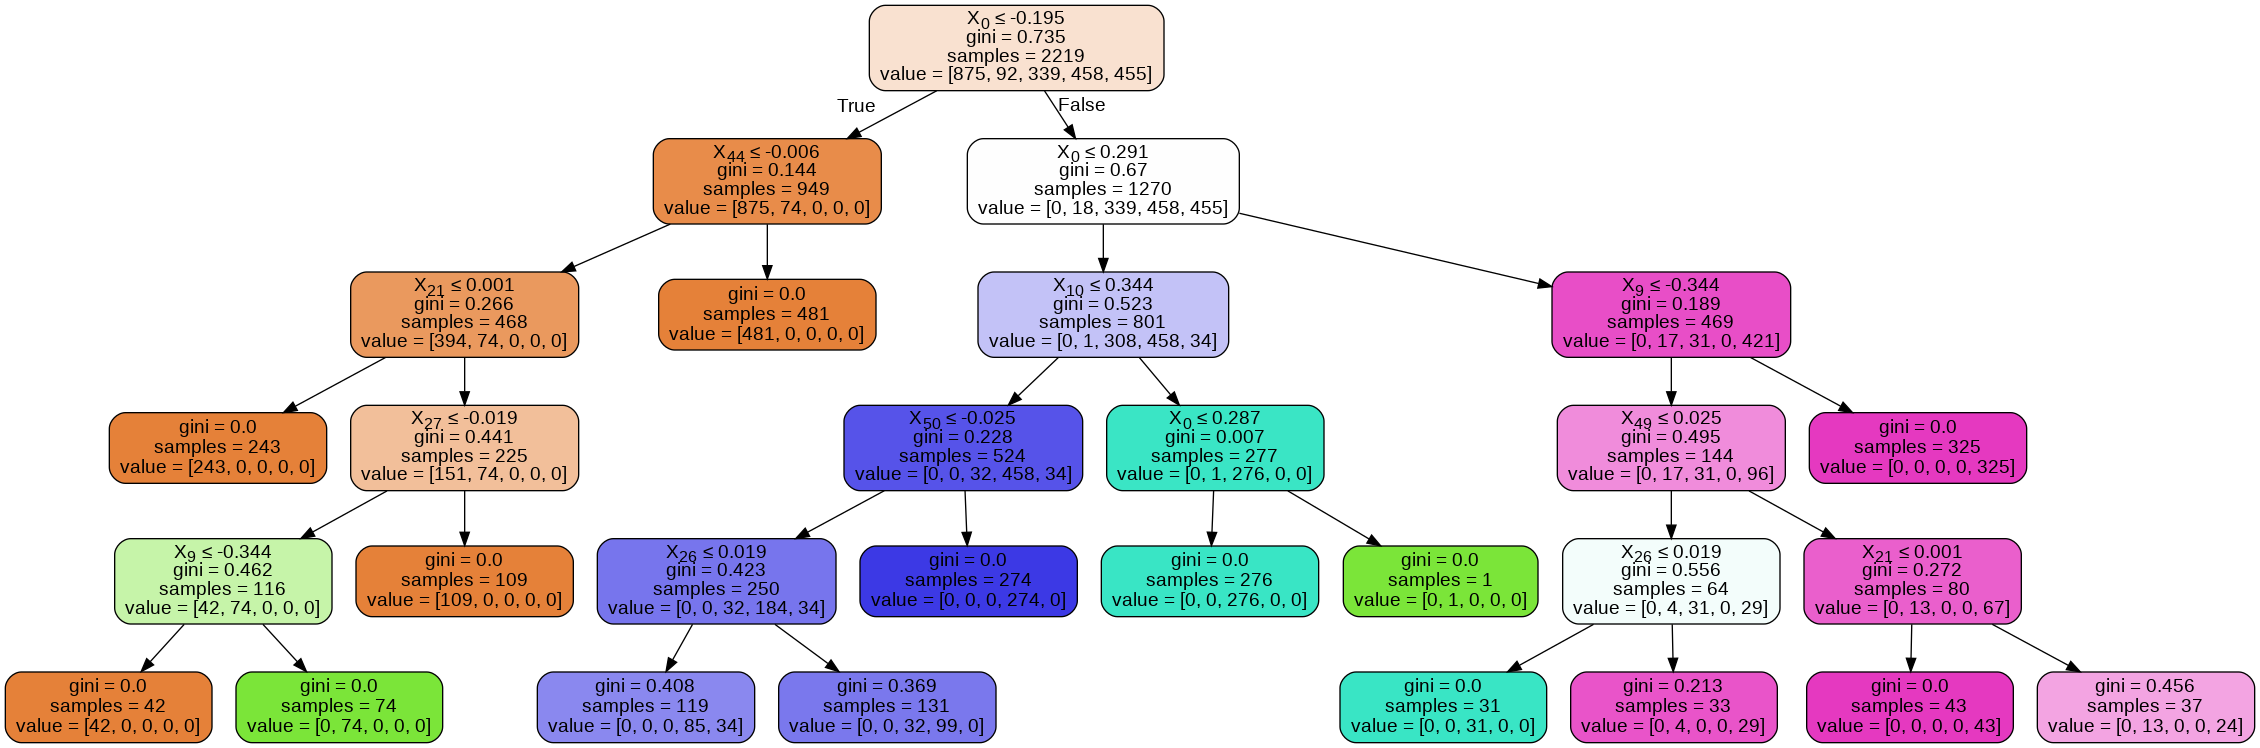

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())